In [65]:
import numpy as np
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
from scipy.optimize import curve_fit

from sklearn.metrics import mean_squared_error

In [46]:
def load_default_coeff(band, temp, var):
    #load default coefficents
    if band == 'S':
        if var == 'kdp': #Wang et al. 2019
            coeff_a = 27.00
            coeff_b = 0.77
        elif var == 'att': #Ryzhkov et al. 2014 table 1
            if temp == 0:
                coeff_a = 2230
                coeff_b = 1.03      
            elif temp == 10:
                coeff_a = 3100
                coeff_b = 1.03
            elif temp == 20:
                coeff_a = 4120
                coeff_b = 1.03
            else:
                print('defaults not found for S band att')
                return None
        else:
            print('defaults not found for S band')
            return None
    elif band == 'C':
        if var == 'kdp': #Ryzhkov et al. 2013 coefficients: Polarimetric radar characteristics of melting hail. part II: Practical implications
            coeff_a = 25.3
            coeff_b = 0.776
        elif var == 'att': #Ryzhkov et al. 2014 table 1
            if temp == 0:
                coeff_a = 221
                coeff_b = 0.92      
            elif temp == 10:
                coeff_a = 250
                coeff_b = 0.91
            elif temp == 20:
                coeff_a = 294
                coeff_b = 0.89
            else:
                print('defaults not found for C band att')
                return None
        else:
            print('defaults not found for C band')
            return None
    else:
        print('defaults not found')
        return None
        
    return [coeff_a, coeff_b]

In [47]:
def plot_verification(band, temp, cant, var, coeff_a, coeff_b):
    #load data
    load_data = np.load(f'pytmatrix_out/brisbane_radarsim_{band}_{cant}deg_{temp}C.npz', allow_pickle=True)
    bris_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
                 'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

    load_data = np.load(f'pytmatrix_out/darwin_radarsim_{band}_{cant}deg_{temp}C.npz')
    darw_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
                 'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

    load_data = np.load(f'pytmatrix_out/broadmeadows_jaya_{band}_{cant}deg_{temp}C.npz')
    broad_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
                 'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

    load_data = np.load(f'pytmatrix_out/mtview_jaya_{band}_{cant}deg_{temp}C.npz')
    mtview_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
                 'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'rain_array':load_data['rain_array']}

    #load default coeff
    if coeff_a is None:
        coeff_list = load_default_coeff(band, temp, var)
        if coeff_list is None:
            return None
        else:
            coeff_a = coeff_list[0]
            coeff_b = coeff_list[1]
    
    def _rain_plot(subplot_id, title, xlabel, coeff_a, coeff_b, radar_data, rain_data, marker):
        ax = plt.subplot(subplot_id)
        estimated_rain = coeff_a*(radar_data**coeff_b)
        plt.plot(estimated_rain, rain_data, marker, markersize=1)
        plt.plot(range(0,101), range(0,101), 'k-', linewidth=0.5)
        plt.xlim([0,75])
        plt.ylim([0,75])
        plt.xlabel(xlabel)
        plt.ylabel("R")
        plt.title(title)
        plt.grid()

    #plot R(kdp) verification
    print(f'coeff for {band} band {temp}C are a:{coeff_a} b:{coeff_b}')
    fig = plt.figure(figsize=(15,12))
    _rain_plot(221, f'R({var}) Brisbane 2DVD at {band} band {temp}C', f'R({var})', coeff_a, coeff_b, bris_dict[f'{var}_array'], bris_dict['rain_array'], 'b.')
    _rain_plot(222, f'R({var}) Darwin 2DVD at {band} band {temp}C', f'R({var})', coeff_a, coeff_b, darw_dict[f'{var}_array'], darw_dict['rain_array'], 'r.')
    _rain_plot(223, f'R({var}) Broadmeadows OTT-P1 at {band} band {temp}C', f'R({var})', coeff_a, coeff_b, broad_dict[f'{var}_array'], broad_dict['rain_array'], 'g.')
    _rain_plot(224, f'R({var}) MtView OTT-P1 at {band} band {temp}C', f'R({var})', coeff_a, coeff_b, mtview_dict[f'{var}_array'], mtview_dict['rain_array'], 'm.')
    

coeff for S band 0C are a:2230 b:1.03
coeff for S band 10C are a:3100 b:1.03
coeff for S band 20C are a:4120 b:1.03
coeff for C band 0C are a:221 b:0.92
coeff for C band 10C are a:250 b:0.91
coeff for C band 20C are a:294 b:0.89


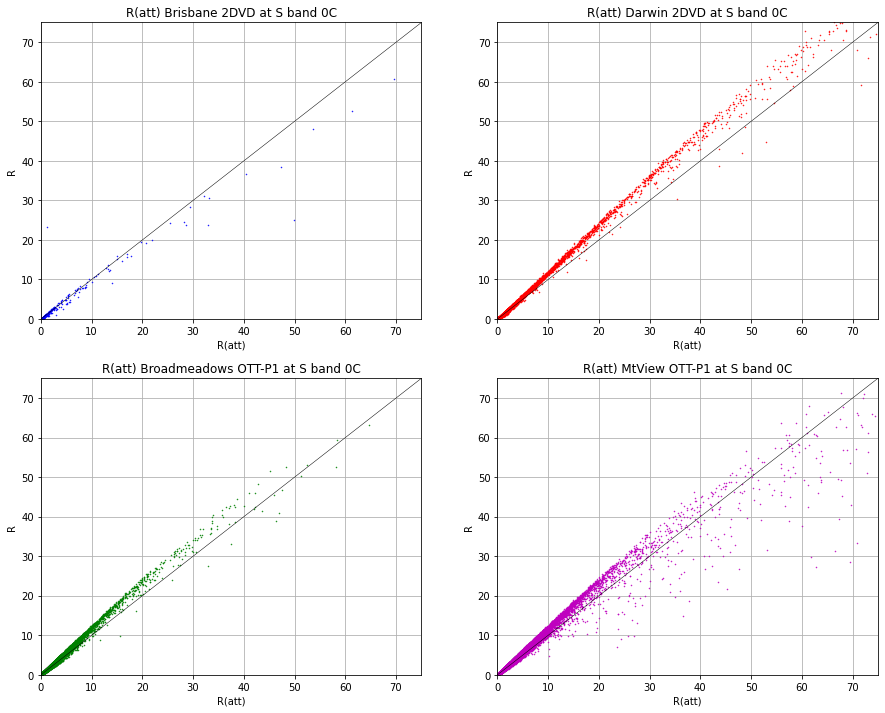

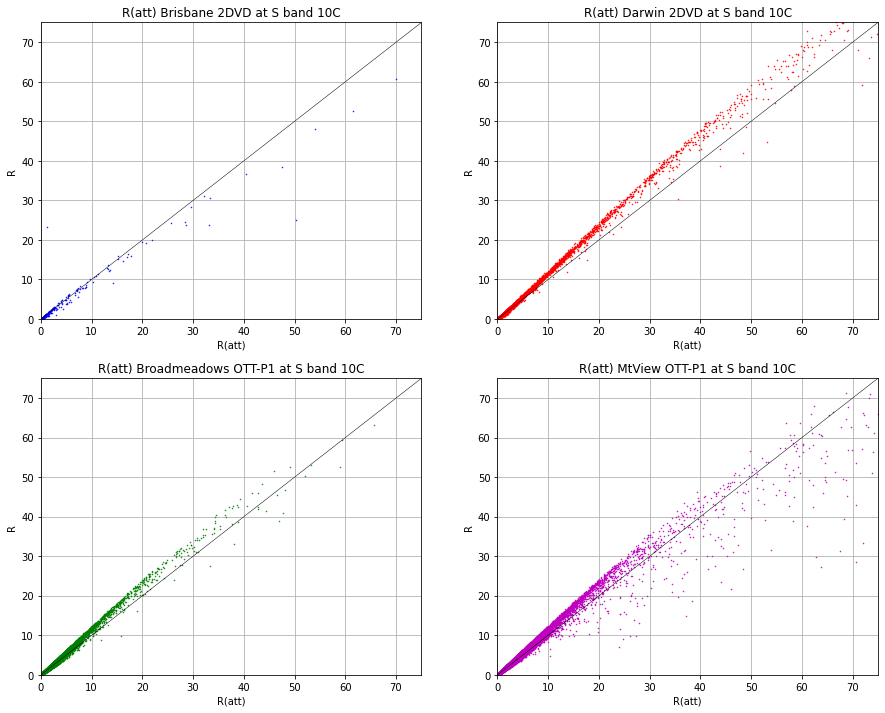

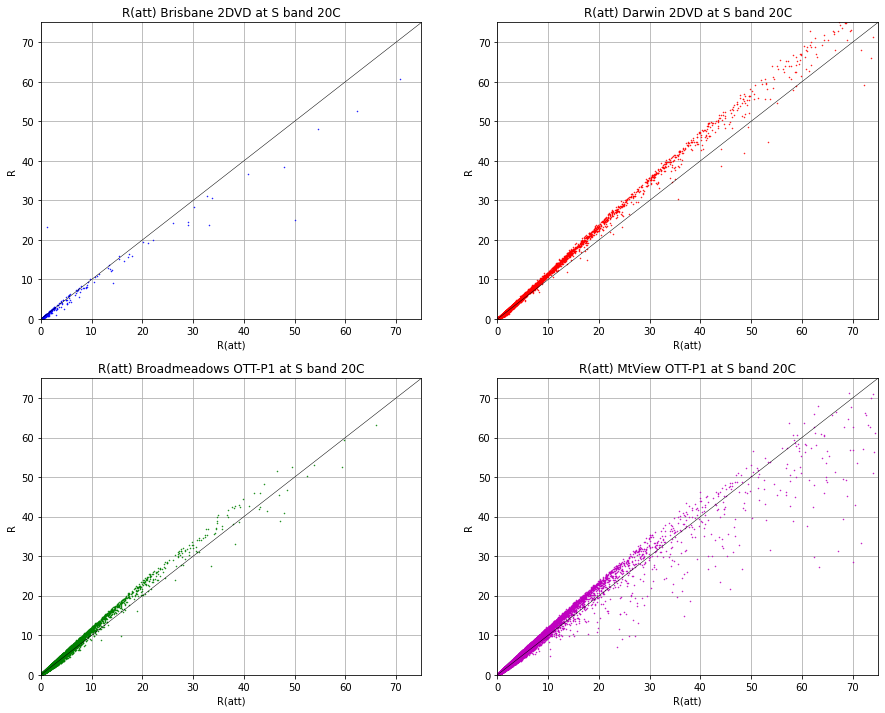

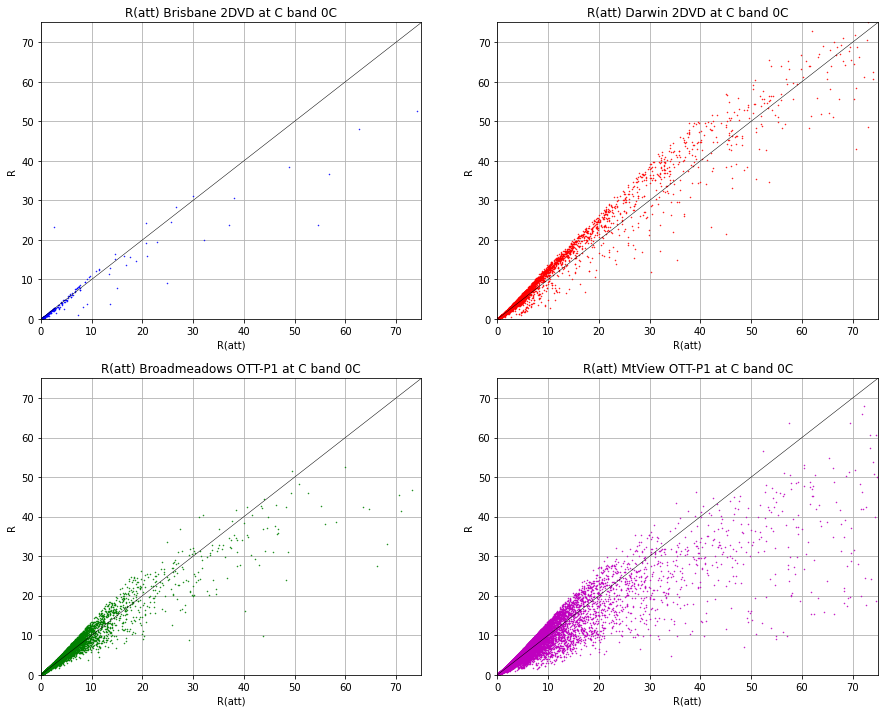

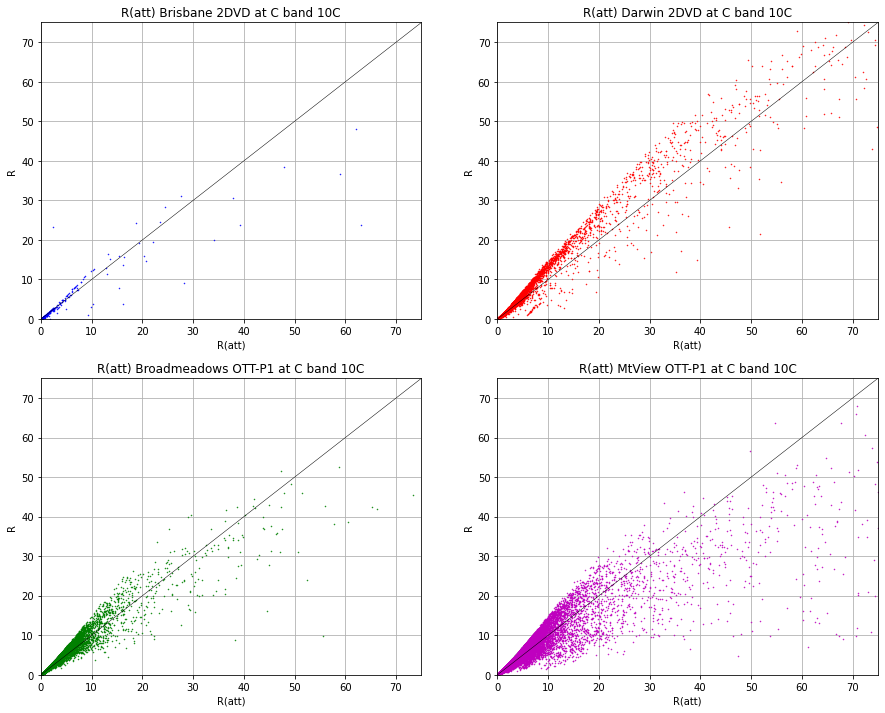

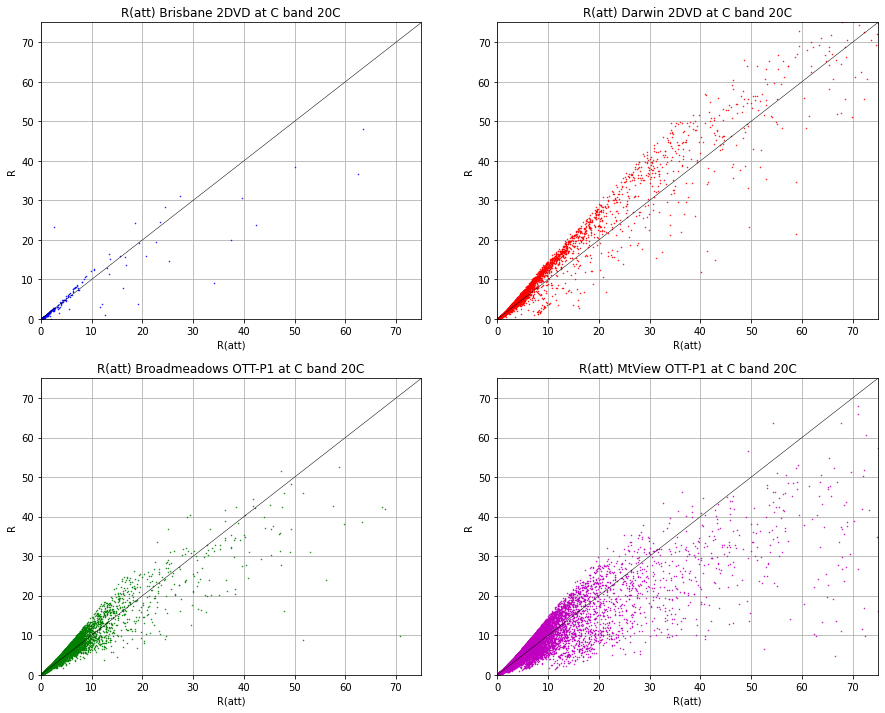

In [48]:
plot_verification('S', 0, 10, 'att', None, None)
plot_verification('S', 10, 10, 'att', None, None)
plot_verification('S', 20, 10, 'att', None, None)

plot_verification('C', 0, 10, 'att', None, None)
plot_verification('C', 10, 10, 'att', None, None)
plot_verification('C', 20, 10, 'att', None, None)


<ipython-input-89-1f5555347493>:7: RuntimeWarning: overflow encountered in power
  return a*(x**b)
<ipython-input-89-1f5555347493>:7: RuntimeWarning: overflow encountered in multiply
  return a*(x**b)
<ipython-input-89-1f5555347493>:7: RuntimeWarning: overflow encountered in power
  return a*(x**b)
<ipython-input-89-1f5555347493>:7: RuntimeWarning: overflow encountered in multiply
  return a*(x**b)
<ipython-input-89-1f5555347493>:7: RuntimeWarning: overflow encountered in power
  return a*(x**b)
<ipython-input-89-1f5555347493>:7: RuntimeWarning: overflow encountered in multiply
  return a*(x**b)


For S band at 0C, RMSE for default:1.24 fitted:0.6 mm/hr
For S band at 10C, RMSE for default:1.21 fitted:0.6 mm/hr
For S band at 20C, RMSE for default:1.12 fitted:0.58 mm/hr
For C band at 0C, RMSE for default:2.23 fitted:1.93 mm/hr
For C band at 10C, RMSE for default:2.66 fitted:2.2 mm/hr
For C band at 20C, RMSE for default:2.9 fitted:2.37 mm/hr


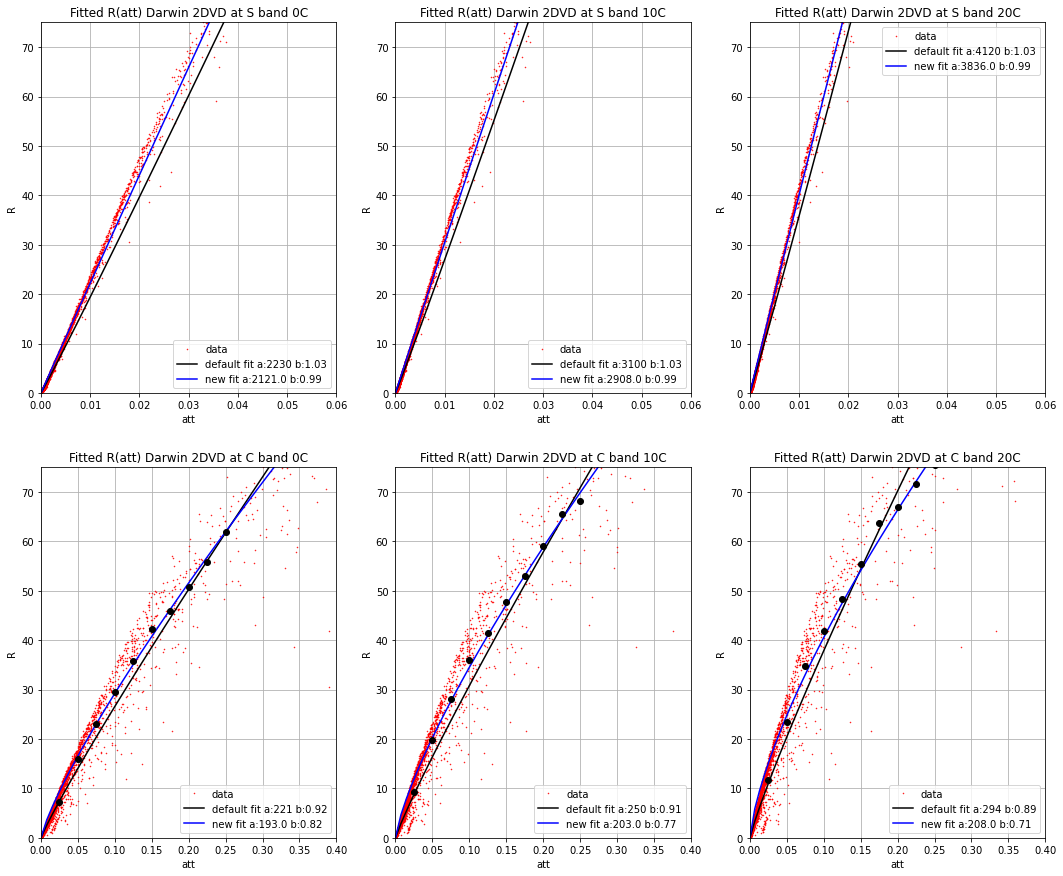

In [89]:
#Use Darwin to refit R(A)

def plot_verification(subplot_id, band, temp, cant, var, xlim_max):
    
    def _func(x, a, b):
        #function used for fitting dzdr/dz - alpha slope
        return a*(x**b)

    def _rain_plot(subplot_id, title, xlabel, fitted_coeff_a, fitted_coeff_b, default_coeff_a, default_coeff_b, radar_data, rain_data, marker):
        ax = plt.subplot(subplot_id)
        
        #fit dummy radar data
        dummy_radar_var = np.linspace(np.min(radar_data), np.max(radar_data), 100)
        fitted_dummy_rain = fitted_coeff_a*(dummy_radar_var**fitted_coeff_b)
        default_dummy_rain = default_coeff_a*(dummy_radar_var**default_coeff_b)
        fitted_rain = fitted_coeff_a*(radar_data**fitted_coeff_b)
        default_rain = default_coeff_a*(radar_data**default_coeff_b)       
        
        #plot pairs
        plt.plot(radar_data, rain_data, marker, markersize=1)
        #plot default fit
        plt.plot(dummy_radar_var, default_dummy_rain, 'k-', markersize=1)
        #plot new fit
        plt.plot(dummy_radar_var, fitted_dummy_rain, 'b-', markersize=1)
        plt.ylim([0,75])
        plt.xlim([0,xlim_max])
        plt.ylabel("R")
        plt.xlabel(xlabel)
        plt.title(title)
        plt.grid()
        plt.legend(['data', f'default fit a:{default_coeff_a} b:{default_coeff_b}',
                    f'new fit a:{fitted_coeff_a} b:{fitted_coeff_b}'])
        #print RMSE
        fitted_rmse = np.round(np.sqrt(mean_squared_error(rain_data, fitted_rain)), decimals=2)
        default_rmse = np.round(np.sqrt(mean_squared_error(rain_data, default_rain)), decimals=2)
        print(f'For {band} band at {temp}C, RMSE for default:{default_rmse} fitted:{fitted_rmse} mm/hr')
        
    #load data
    load_data = np.load(f'pytmatrix_out/darwin_radarsim_{band}_{cant}deg_{temp}C.npz')
    darw_dict = {'dbz_array':load_data['dbz_array'], 'zdr_db_array':load_data['zdr_db_array'],
                 'kdp_array':load_data['kdp_array'], 'att_array':load_data['att_array'], 'time_array':load_data['att_array'], 'rain_array':load_data['rain_array']}
    radar_data = darw_dict[f'{var}_array']
    rain_data = darw_dict['rain_array']
    #load default coeff
    coeff_list = load_default_coeff(band, temp, var)
    if coeff_list is None:
        return None
    else:
        default_coeff_a = coeff_list[0]
        default_coeff_b = coeff_list[1]
        
    #set att bins
    if band == 'C':
        bin_width = 0.025
        att_bin_centres = np.arange(bin_width, 0.25+bin_width, bin_width)
        att_bin_rain = np.zeros_like(att_bin_centres)
        for i, centre in enumerate(att_bin_centres):
            mask = np.logical_and(radar_data>=(centre-(bin_width/2)), radar_data<(centre+(bin_width/2)))
            att_bin_rain[i] = np.mean(rain_data[mask])
    else:
        att_bin_centres = radar_data
        att_bin_rain = rain_data
    
    
    
    #fit to curve
    popt, pcov = curve_fit(_func, att_bin_centres, att_bin_rain)
    fitted_coeff_a = np.round(popt[0], decimals=0)
    fitted_coeff_b = np.round(popt[1], decimals=2)
    #print(f'For {band} band at {temp}C, estimated coefficents are a:{fitted_coeff_a} b:{fitted_coeff_b}')
    
    #plot fit
    
    _rain_plot(subplot_id, f'Fitted R({var}) Darwin 2DVD at {band} band {temp}C', var,
               fitted_coeff_a, fitted_coeff_b, default_coeff_a, default_coeff_b,
               radar_data, rain_data, 'r.')
    
    if band == 'C':
        plt.plot(att_bin_centres, att_bin_rain, 'ko')
    
fig = plt.figure(figsize=(18,15))
plot_verification(231, 'S', 0, 10, 'att', 0.06)
plot_verification(232, 'S', 10, 10, 'att', 0.06)
plot_verification(233, 'S', 20, 10, 'att', 0.06)
plot_verification(234, 'C', 0, 10, 'att', 0.4)
plot_verification(235, 'C', 10, 10, 'att', 0.4)
plot_verification(236, 'C', 20, 10, 'att', 0.4)